In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Typology of Quantum Algorithms.xlsx", sheet_name="Genealogy")[["Algorithm", "Primitive used"]]
df.head()

,Algorithm,Primitive used
0,QFT,NaN
1,QPE,QFT
2,Shor,QPE
3,HHL,QPE
4,VQE,NaN


In [3]:
df['Primitive used'] = df['Primitive used'].apply(lambda primitive: {i for i in primitive.split(",")} if (isinstance(primitive, str) and "," in primitive) else primitive)
df

,Algorithm,Primitive used
0,QFT,NaN
1,QPE,QFT
2,Shor,QPE
3,HHL,QPE
4,VQE,NaN
...,...,...
141,Quantum Full configuration interaction (FCI),Bayesian QPE
142,Quantum Density funtional theory(DFT) method,"{VQE, HHL}"
143,Circuit formulation of adiabatic algorithm for...,NaN
144,variational quantum algorithm for protein fold...,VQE


In [4]:
df_exploded = df.explode("Primitive used")
df_exploded

,Algorithm,Primitive used
0,QFT,NaN
1,QPE,QFT
2,Shor,QPE
3,HHL,QPE
4,VQE,NaN
...,...,...
142,Quantum Density funtional theory(DFT) method,VQE
142,Quantum Density funtional theory(DFT) method,HHL
143,Circuit formulation of adiabatic algorithm for...,NaN
144,variational quantum algorithm for protein fold...,VQE


In [10]:
import networkx as nx

In [45]:
df_exploded

,Algorithm,Primitive used
0,QFT,NaN
1,QPE,QFT
2,Shor,QPE
3,HHL,QPE
4,VQE,NaN
...,...,...
142,Quantum Density funtional theory(DFT) method,VQE
142,Quantum Density funtional theory(DFT) method,HHL
143,Circuit formulation of adiabatic algorithm for...,NaN
144,variational quantum algorithm for protein fold...,VQE


In [40]:
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [41]:
# !pip install networkx --upgrade -q

In [22]:
# !pip install networkx --upgrade

In [33]:
!pip install python-louvain

  Using cached python_louvain-0.16-py3-none-any.whl

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [115]:
from pyvis.network import Network
import community as community_louvain
import numpy as np

In [143]:
df_exploded['Primitive used'].replace("ΝΑ", np.nan, inplace=True)
df_exploded['Primitive used'] = df_exploded['Primitive used'].apply(str.strip)
df_exploded['Algorithm'] = df_exploded['Algorithm'].apply(str.strip)
df_exploded['Algorithm'] 
df_exploded = df_exploded.dropna(subset=['Primitive used']).reset_index(drop=True)
df_exploded

,Algorithm,Primitive used
0,QPE,QFT
1,Shor,QPE
2,HHL,QPE
3,Variational Quantum imaginary time evolution,VQE
4,Grover,AA
...,...,...
107,Quantum Full configuration interaction (FCI),Bayesian QPE
108,Quantum Density funtional theory(DFT) method,VQE
109,Quantum Density funtional theory(DFT) method,HHL
110,variational quantum algorithm for protein fold...,VQE


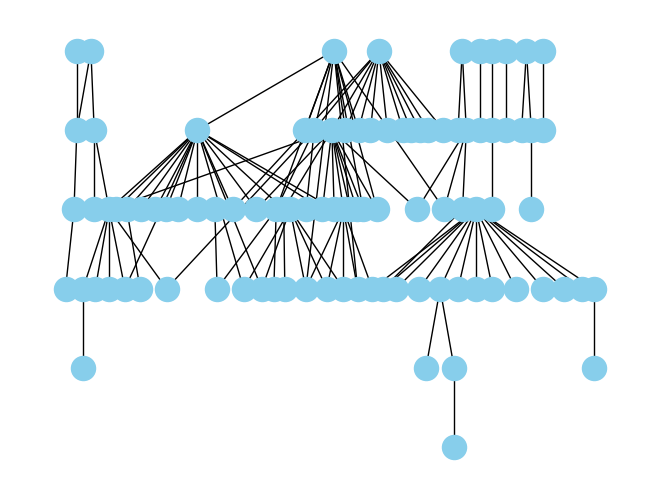

In [144]:
# pos = nx.kamada_kawai_layout(G)

G = nx.from_pandas_edgelist(df_exploded,
                            target="Algorithm",
                            source="Primitive used",
                            create_using= nx.Graph()
                           )

# nx.draw(G)

pos = graphviz_layout(G, prog='dot')
import matplotlib.pyplot as plt
nx.draw(G, node_color="skyblue", edge_cmap=plt.cm.Blues, pos=pos)


communities = community_louvain.best_partition(G)
nx.set_node_attributes(G, communities, 'group')

In [145]:
df_exploded.tail(30)

,Algorithm,Primitive used
82,Iterative QAE,Grover
83,Finance Monte Carlo simulation via QAE,QPE
84,Finance Monte Carlo simulation via QAE,Grover
85,Variational Quantum Fidelity Estimation,VQE
86,GBS Dense k-subgraph,GBS Perfect matching
87,Weighted-maximum/ maximum clique via Gaussian ...,GBS Dense k-subgraph
88,Strongly correlated fermionic system simulation,Quantum Ferminon Fourier transformation
89,Aharonov–Jones–Landau algorithm,Hadamard test
90,Quantum algorithm for Feynman loop integrals,Grover
91,qantum simulation of effective field theories ...,QFT


In [146]:
for row in df_exploded['Primitive used']:
    if row.strip().endswith("ΝΑ"):
        print(row)

In [148]:
net = Network(notebook=True, 
              width="1200px", 
              height="900px",
              directed=True,
              cdn_resources="remote",
             font_color="white",
            bgcolor="#222222"
             )
net.from_nx(G)
net.show_buttons(filter_=['physics'])
net.show("genealogy_qalgorithms.html")

genealogy_qalgorithms.html


In [46]:
graph = df_exploded.dropna(subset=['Primitive used'])

In [47]:
graph

,Algorithm,Primitive used
1,QPE,QFT
2,Shor,QPE
3,HHL,QPE
6,Variational Quantum imaginary time evolution,VQE
8,Grover,AA
...,...,...
141,Quantum Full configuration interaction (FCI),Bayesian QPE
142,Quantum Density funtional theory(DFT) method,HHL
142,Quantum Density funtional theory(DFT) method,VQE
144,variational quantum algorithm for protein fold...,VQE


In [49]:
algorithms =nx.Graph()
for index, edge in graph.iterrows():
    algorithms.add_edge(edge['Algorithm'], edge['Primitive used'])

In [52]:
from pyviz import Network

ModuleNotFoundError: No module named 'pyviz'